In [1]:
y = [1, 1, 1, 2, 2, 2, 3, 3, 4]

In [2]:
from collections import Counter
counter = Counter(y)
counter

Counter({1: 3, 2: 3, 3: 2, 4: 1})

In [5]:
counter.values()

dict_values([3, 3, 2, 1])

In [6]:
def gini(y):
    counter = Counter(y)
    result = 0
    for v in counter.values():
        result += (v/ len(y))**2
    return 1-result

In [7]:
gini(y)

0.7160493827160495

In [8]:
import numpy as np

In [9]:
X = np.array([[5, 5],
              [4, 7],
              [2, 5],
              [1, 3],
              [3, 4]])
y = np.array([0, 0, 0, 1, 1])

In [10]:
import matplotlib.pyplot as plt

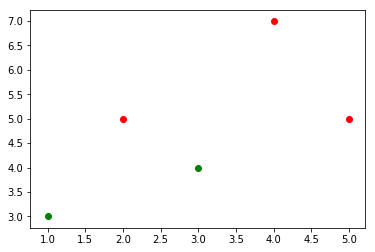

In [11]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.show()

In [13]:
def cut(X, y, v, d):
    ind_left = (X[:, d] <= v)
    ind_right = (X[:, d] > v)
    return X[ind_left], X[ind_right], y[ind_left], y[ind_right]

def try_split(X, y):
    best_g, best_d, best_v = 1, -1, -1
    for d in range(X.shape[1]):
        sorted_ind = np.argsort(X[:, d])
        for i in range(len(X) - 1):
            if X[sorted_ind[i], d] == X[sorted_ind[i+1], d]:
                continue
            v = (X[sorted_ind[i], d] + X[sorted_ind[i+1], d])/2
            X_left, X_right, y_left, y_right = cut(X, y, v, d)
            g_all = gini(y_left) + gini(y_right)
            if g_all < best_g:
                best_g, best_d, best_v =g_all, d, v
    return best_g, best_d, best_v


In [14]:
try_split(X, y)

(0.0, 1, 4.5)